In [34]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
rides = pd.read_pickle('/home/michael/Documents/Projects/divvydataproject/data/dateagg.pkl')
rides = rides.reset_index(inplace = False)
rides.columns = ['ds','y']
rides = rides.sort_values('ds')
rides.tail()

,ds,y
1630,2017-12-27,1138
1631,2017-12-28,1294
1632,2017-12-29,1076
1633,2017-12-30,548
1634,2017-12-31,651


In [93]:
rides.y.sum()

13822258

In [96]:
rides.sort_values('y',ascending = False).head(10)

,ds,y
1158,2016-07-16,24989
735,2015-07-04,24801
1542,2017-07-08,22106
1549,2017-07-15,21945
677,2015-06-27,21703
734,2015-07-03,21289
1187,2016-07-09,21154
743,2015-07-12,20987
1521,2017-07-29,20798
1496,2017-08-19,20797


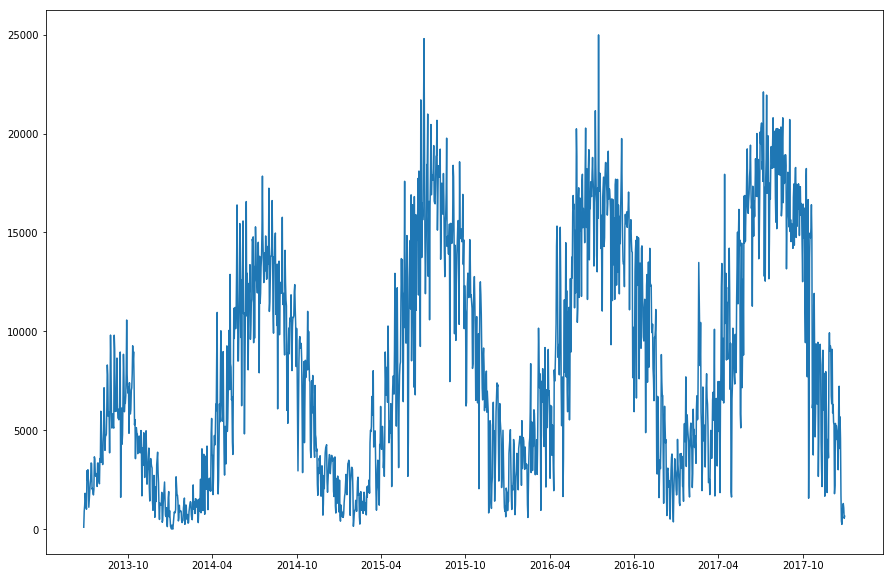

In [69]:
plt.figure(figsize = (15,10))
plt.plot(rides['ds'] , rides['y']);

## Facebook Prophet

In [126]:
m = Prophet()
m.fit(rides);

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/michael/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [127]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
2007,2018-12-27
2008,2018-12-28
2009,2018-12-29
2010,2018-12-30
2011,2018-12-31


In [128]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2007,2018-12-27,4237.213519,571.415288,8058.012398
2008,2018-12-28,4467.763210,1044.924323,7967.993584
2009,2018-12-29,4342.767190,666.781104,7832.095040
2010,2018-12-30,3695.500654,-85.863377,7371.897687
2011,2018-12-31,4337.153801,923.271988,8022.419486


In [129]:
forecast.tail()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
2007,2018-12-27,11136.599339,9186.215901,13135.097384,571.415288,8058.012398,-6899.385820,-6899.385820,-6899.385820,-6899.385820,-6899.385820,-6899.385820,-111.138852,-111.138852,-111.138852,-6788.246967,-6788.246967,-6788.246967,4237.213519
2008,2018-12-28,11137.913358,9180.136101,13142.721532,1044.924323,7967.993584,-6670.150147,-6670.150147,-6670.150147,-6670.150147,-6670.150147,-6670.150147,197.013010,197.013010,197.013010,-6867.163158,-6867.163158,-6867.163158,4467.763210
2009,2018-12-29,11139.227377,9174.056302,13151.779162,666.781104,7832.095040,-6796.460187,-6796.460187,-6796.460187,-6796.460187,-6796.460187,-6796.460187,138.082749,138.082749,138.082749,-6934.542936,-6934.542936,-6934.542936,4342.767190
2010,2018-12-30,11140.541396,9167.976502,13160.807137,-85.863377,7371.897687,-7445.040741,-7445.040741,-7445.040741,-7445.040741,-7445.040741,-7445.040741,-455.599964,-455.599964,-455.599964,-6989.440777,-6989.440777,-6989.440777,3695.500654
2011,2018-12-31,11141.855415,9161.896702,13169.546184,923.271988,8022.419486,-6804.701613,-6804.701613,-6804.701613,-6804.701613,-6804.701613,-6804.701613,226.399814,226.399814,226.399814,-7031.101427,-7031.101427,-7031.101427,4337.153801


In [130]:
forecast.columns

Index(['ds', 'trend', 'trend_lower', 'trend_upper', 'yhat_lower', 'yhat_upper',
       'seasonal', 'seasonal_lower', 'seasonal_upper', 'seasonalities',
       'seasonalities_lower', 'seasonalities_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'yearly', 'yearly_lower', 'yearly_upper', 'yhat'],
      dtype='object')

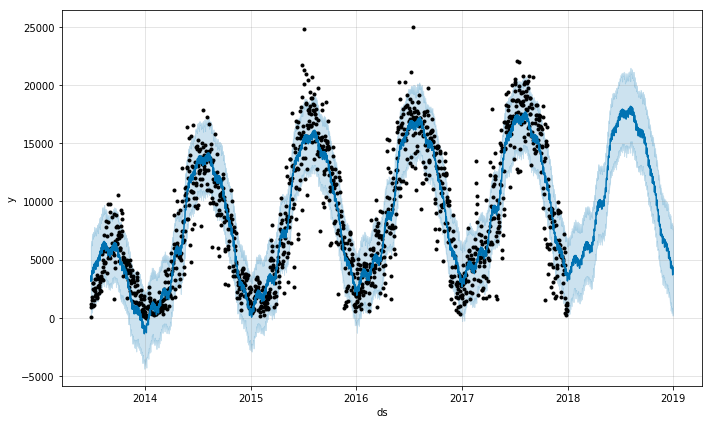

In [73]:
m.plot(forecast);

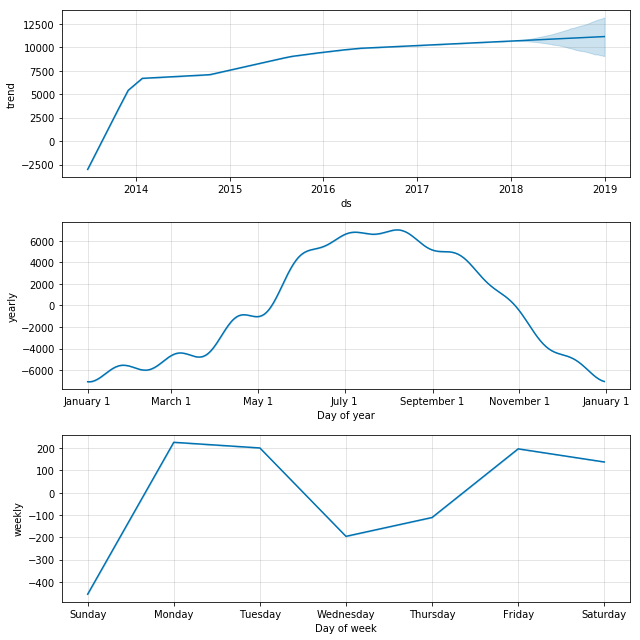

In [77]:
m.plot_components(forecast);

## Holidays

In [117]:
fourth = pd.DataFrame({
  'holiday': 'Fourth',
  'ds': pd.to_datetime(['2013-07-04', '2014-07-04', '2015-07-04',
                        '2016-07-04', '2017-07-04','2018-07-04']),
  'lower_window': -1,
  'upper_window': 1,
})

pitchfork = pd.DataFrame({
  'holiday': 'Fourth',
  'ds': pd.to_datetime(['2013-07-20', '2014-07-19', '2015-07-18',
                        '2016-07-16', '2017-07-15','2018-07-21']),
  'lower_window': -1,
  'upper_window': 1,
})

holidays  = pd.concat((fourth,pitchfork))

In [118]:
m2 = Prophet(holidays = holidays)
m2.fit(rides)
future2 = m2.make_future_dataframe(periods=365)
forecast2 = m.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/michael/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


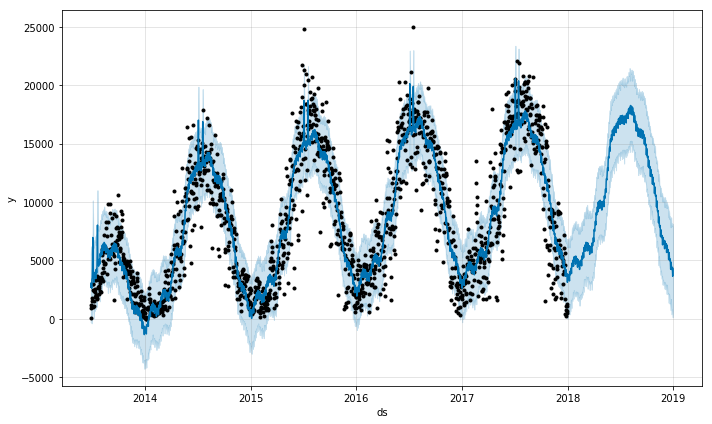

In [119]:
m2.plot(forecast2);

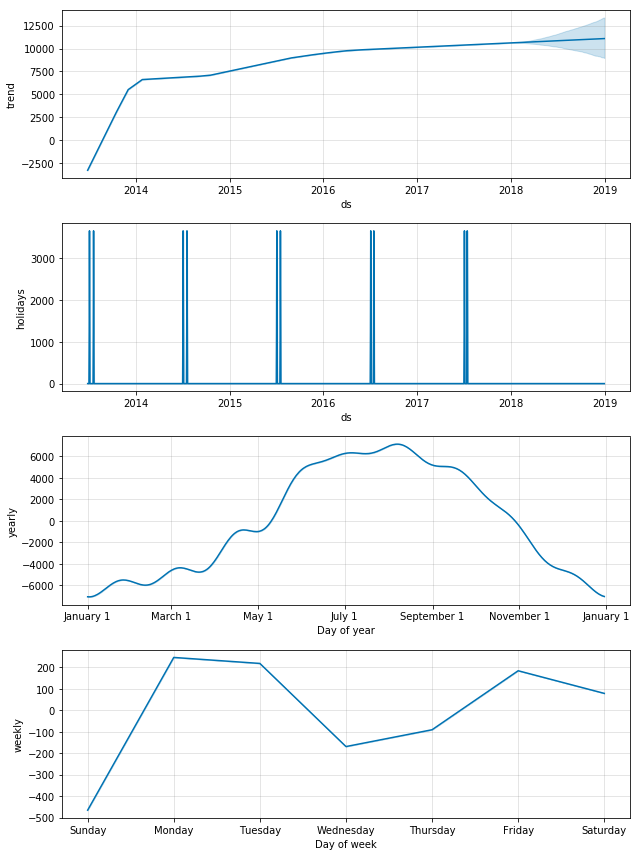

In [120]:
m2.plot_components(forecast2);

## Log Tranform

In [104]:
logrides = rides.copy(deep = True)
logrides['y'] = np.log(logrides['y'])

In [121]:
m3 = Prophet()
m3.fit(logrides)
future3 = m3.make_future_dataframe(periods=365)
forecast3 = m3.predict(future3)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/michael/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


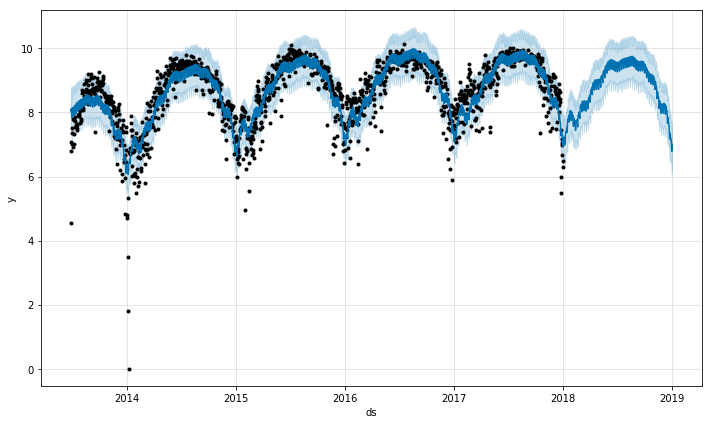

In [122]:
m3.plot(forecast3);

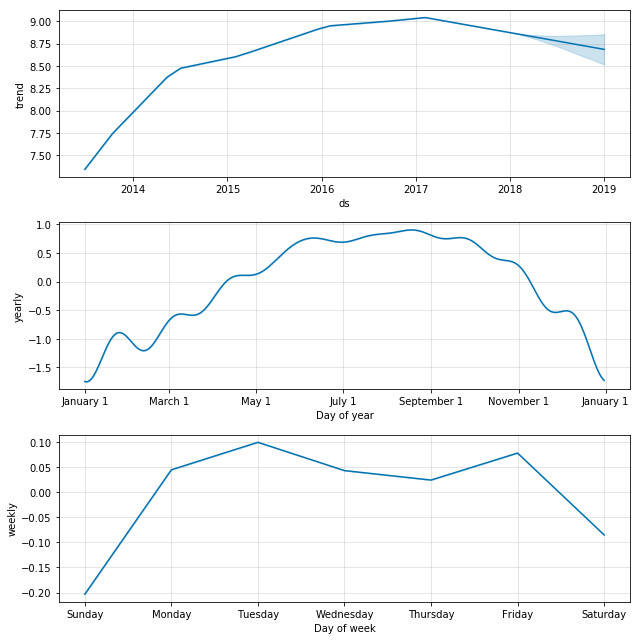

In [131]:
m3.plot_components(forecast3);